In [52]:
import pandas as pd
import numpy as np
import nltk
import string
import math
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import pickle
import plotly
import plotly.express as px
from plotly.offline import iplot,init_notebook_mode
import cufflinks as cf
from IPython.display import display,HTML
cf.set_config_file(sharing='public',theme='white',offline=True)
init_notebook_mode(connected=True)

import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,f1_score,classification_report,accuracy_score
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from bs4 import BeautifulSoup
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from tqdm import tqdm
import os

import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.wrappers import TimeDistributed
from keras.layers.embeddings import Embedding
from keras.layers import Conv1D,MaxPooling1D
from keras.layers import Dropout,Bidirectional
from keras.callbacks import TensorBoard
from keras.layers.recurrent import LSTM
from keras.models import load_model

import warnings
warnings.filterwarnings('ignore')

In [2]:
display = pd.read_csv('results_afterclean.csv', index_col = int)

In [3]:
print(display.shape)
display.head()

(5947, 4)


,Id,Title,Body,Date
0,onczgl,"Peer Review, Lectures for Highschool Students","Hi everyone,\n\nI'm a penetration tester that ...",2021-07-19
1,j69zvq,[Megathread] What are your favorite resources ...,"This thread will be open until New Years, pinn...",2020-10-06
2,mbmlyu,What are the biggest threats to look out for i...,"Hi,\n\nWhere I work, we are quite heavily inve...",2021-03-23
3,lx39w4,Where do you guys in IT security department ge...,"Hi,\n\nI was wondering where all you guys work...",2021-03-03
4,kb3uw3,What are the browser extensions that you use w...,I use the following extensions :-\n\n1. retire...,2020-12-11


In [4]:
display['Date'].unique()

array(['2021-07-19', '2020-10-06', '2021-03-23', '2021-03-03',
       '2020-12-11', '2021-08-25', '2021-03-27', '2021-03-16',
       '2021-08-15', '2020-10-28', '2021-03-15', '2021-01-06',
       '2020-10-27', '2021-08-17', '2021-01-24', '2020-09-14',
       '2021-09-03', '2020-12-31', '2020-11-12', '2020-09-16',
       '2021-08-22', '2021-02-24', '2021-02-12', '2020-09-25',
       '2021-03-18', '2021-03-24', '2020-10-14', '2020-09-23',
       '2020-09-08', '2021-02-17', '2020-10-29', '2021-03-09',
       '2020-10-15', '2021-01-26', '2021-04-10', '2020-12-29',
       '2020-11-27', '2020-09-20', '2021-08-24', '2020-12-15',
       '2020-10-05', '2020-09-09', '2020-09-28', '2020-09-17',
       '2021-01-25', '2021-01-11', '2020-11-23', '2020-09-10',
       '2021-08-14', '2021-03-07', '2020-12-14', '2020-12-21',
       '2021-08-26', '2021-01-10', '2020-12-17', '2021-03-19',
       '2021-03-02', '2021-03-01', '2021-01-13', '2020-10-12',
       '2020-10-09', '2020-09-19', '2021-08-16', '2021-

In [5]:
display.isnull().sum()

Id       0
Title    0
Body     0
Date     0
dtype: int64

In [6]:
sorted_data=display.sort_values('Id', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [7]:
sorted_data

,Id,Title,Body,Date
539,innck1,Advice on assessing a new Device on the network,Hi All\n\nSo I have task of assessing a new ty...,2020-09-06
2155,innh7b,Please can I have some advice on purchasing an...,"Hi all,\n\nI have a decorator starting work in...",2020-09-06
4717,inny8m,What is the best cheap Wi-Fi cracking/hacking ...,"Hey everyone, I've started getting into hackin...",2020-09-06
2154,inoagg,Element.io shows 4 active sessions even though...,Hi there. \n\nI have an Element.io account tha...,2020-09-06
2153,inp3we,I use Element.io for chatting and sharing file...,Hi there. \n\nI need to do the following: \n\n...,2020-09-06
...,...,...,...,...
571,piif06,PLS HELP,So my friend's account got hacked and whoever...,2021-09-05
3592,pipb1e,I Passed PenTest+!!,"Just like the title says, I just passed **PenT...",2021-09-06
4846,piqqv0,Honeypot for malicious script kiddies,This is kind of a silly idea. I sometimes get ...,2021-09-06
1465,piqzk6,CISSP - Patch Management = DOMAIN 7 My Video,Patch Management is one of the important topic...,2021-09-06


In [8]:
sorted_data[sorted_data.duplicated()]

,Id,Title,Body,Date


In [9]:
sorted_data.duplicated().sum()

0

In [10]:
filtered_data = sorted_data[~sorted_data.duplicated()]

In [11]:
filtered_data = filtered_data.reset_index(drop=True)

In [12]:
filtered_data.head()

,Id,Title,Body,Date
0,innck1,Advice on assessing a new Device on the network,Hi All\n\nSo I have task of assessing a new ty...,2020-09-06
1,innh7b,Please can I have some advice on purchasing an...,"Hi all,\n\nI have a decorator starting work in...",2020-09-06
2,inny8m,What is the best cheap Wi-Fi cracking/hacking ...,"Hey everyone, I've started getting into hackin...",2020-09-06
3,inoagg,Element.io shows 4 active sessions even though...,Hi there. \n\nI have an Element.io account tha...,2020-09-06
4,inp3we,I use Element.io for chatting and sharing file...,Hi there. \n\nI need to do the following: \n\n...,2020-09-06


In [13]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent_0 = filtered_data['Body'].values[0]
print(sent_0)
print("="*50)
sent_0 = decontracted(sent_0)
print(sent_0)
print("="*50)

Hi All

So I have task of assessing a new type of CCTV and audio conferencing system in our company.

I am looking at any suggestions on how would you do this? 

We do not have a process currently in place so has anyone done this before. 

Does NIST provide any guidance or a template on doing this type of things?

Thanks
Hi All

So I have task of assessing a new type of CCTV and audio conferencing system in our company.

I am looking at any suggestions on how would you do this? 

We do not have a process currently in place so has anyone done this before. 

Does NIST provide any guidance or a template on doing this type of things?

Thanks


In [15]:
sent_0 = re.sub("\S*\d\S*", "", sent_0).strip()
print(sent_0)

Hi All

So I have task of assessing a new type of CCTV and audio conferencing system in our company.

I am looking at any suggestions on how would you do this? 

We do not have a process currently in place so has anyone done this before. 

Does NIST provide any guidance or a template on doing this type of things?

Thanks


In [16]:
sent_0 = re.sub('[^A-Za-z0-9]+', ' ', sent_0)
print(sent_0)

Hi All So I have task of assessing a new type of CCTV and audio conferencing system in our company I am looking at any suggestions on how would you do this We do not have a process currently in place so has anyone done this before Does NIST provide any guidance or a template on doing this type of things Thanks


In [17]:
stop= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't","book","hi","thanks","use","exam","think","know","question",
                                             "questions","good","9th","8th","good","like"
                                              ,"people","x200b","2021","use","help","want","just","know","study"
                                              ,"read","time","10","did","question","book","tests","practice","taking","know"
                                              ,"8th","hi","does" ,"day" ,"got" ,"submit" ,"arriving","edition","study"
                                              ,"answers","used","didn","hours","really","experience","official","youtube",
                                              "official","guide","hello","worth","make","currently","school","getting",
                                               "working","asked","say","able","ask","going","notes","content" ,"today",
                                               "continuing","year","self", "says","doing","years","passed", "exams", "took", "lot", "years",
                                               "videos", "friend", "click", "sent", "new","guys", "education", "video", "products", "product", 
                                               "looking", "better", "took", "old","answer","luck", "exams", "hey", "sub", "ones", "best", 
                                               "away", "thank", "student", "right", "curious", 
                                               "community", "high", "mainly", "proficiency", "failde", 
                                               "looking", "studied","hour", "studying", "course", "enter","would", "using", "google","not", "no","accounts", "account","would", "get", "using", "used", "one", "two", "start", "work", "job","mike", "udemy", "coursera", "professor", "professors", "machines", "box"])

In [18]:
def preprocess(data):
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data):
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        sentance = re.sub('[^A-Za-z]+', ' ', sentance)
        preprocessed_reviews.append(' '.join(token.lower() for token in nltk.word_tokenize(sentance) if token.lower() not in stop))
    return preprocessed_reviews
    #     if len(sentance)==0:
    #         continue
    #     preprocessed_reviews.append(sentance.strip())

In [19]:
preprocessed_reviews = preprocess(filtered_data['Body'].values)

100%|█████████████████████████████████████████████████████████████████████████████| 5947/5947 [00:14<00:00, 420.87it/s]


In [20]:
i=0
list_of_sentance=[]
for sentance in preprocessed_reviews:
    list_of_sentance.append(sentance.split())

In [21]:
list_of_sentance

[['task',
  'assessing',
  'type',
  'cctv',
  'audio',
  'conferencing',
  'system',
  'company',
  'suggestions',
  'process',
  'place',
  'anyone',
  'done',
  'nist',
  'provide',
  'guidance',
  'template',
  'type',
  'things'],
 ['decorator',
  'starting',
  'home',
  'later',
  'month',
  'someone',
  'although',
  'comes',
  'recommended',
  'trusted',
  'feel',
  'trust',
  'stranger',
  'unsupervised',
  'house',
  'locks',
  'internal',
  'doors',
  'understand',
  'could',
  'put',
  'padlocks',
  'rooms',
  'nothing',
  'stopping',
  'removing',
  'screwdriver',
  'buy',
  'wifi',
  'cameras',
  'motion',
  'detectors',
  'set',
  'rooms',
  'entering',
  'way',
  'text',
  'message',
  'goes',
  'watch',
  'happening',
  'call',
  'happening',
  'anyone',
  'advice',
  'cameras',
  'buy',
  'come',
  'pack',
  'reasonably',
  'priced',
  'free',
  'cloud',
  'storage',
  'first',
  'month',
  'recognise',
  'however',
  'cameras',
  'may',
  'security',
  'issues',
  'a

In [22]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_reviews)

In [23]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=6, n_init=1)

In [24]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [25]:
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 0:
 file
 windows
 ip
 network
 machine
 server
 kali
 linux
 access
 files
Cluster 1:
 security
 hacking
 anyone
 find
 learn
 cybersecurity
 could
 also
 cyber
 something
Cluster 2:
 messer
 dion
 test
 jason
 core
 comptia
 pbqs
 first
 also
 security
Cluster 3:
 password
 email
 phone
 passwords
 hash
 address
 wifi
 access
 someone
 emails
Cluster 4:
 oscp
 boxes
 lab
 pwk
 labs
 htb
 points
 machine
 take
 report
Cluster 5:
 cissp
 test
 boson
 sybex
 kelly
 technical
 pass
 security
 also
 last


In [26]:
from sklearn.cluster import KMeans
tf_idf_vect = TfidfVectorizer()
X_train=tf_idf_vect.fit_transform(preprocessed_reviews)
X_train.shape

(5947, 20430)

In [27]:
tf_idf_vect.vocabulary_

{'task': 17862,
 'assessing': 1056,
 'type': 18753,
 'cctv': 2538,
 'audio': 1192,
 'conferencing': 3429,
 'system': 17769,
 'company': 3242,
 'suggestions': 17504,
 'process': 13812,
 'place': 13243,
 'anyone': 787,
 'done': 5263,
 'nist': 11864,
 'provide': 13978,
 'guidance': 7895,
 'template': 17981,
 'things': 18149,
 'decorator': 4422,
 'starting': 17111,
 'home': 8380,
 'later': 10031,
 'month': 11369,
 'someone': 16706,
 'although': 597,
 'comes': 3174,
 'recommended': 14552,
 'trusted': 18667,
 'feel': 6647,
 'trust': 18666,
 'stranger': 17259,
 'unsupervised': 19094,
 'house': 8472,
 'locks': 10403,
 'internal': 9257,
 'doors': 5277,
 'understand': 18890,
 'could': 3770,
 'put': 14118,
 'padlocks': 12654,
 'rooms': 15414,
 'nothing': 11966,
 'stopping': 17231,
 'removing': 14893,
 'screwdriver': 15803,
 'buy': 2275,
 'wifi': 19957,
 'cameras': 2354,
 'motion': 11406,
 'detectors': 4736,
 'set': 16056,
 'entering': 5948,
 'way': 19740,
 'text': 18059,
 'message': 10990,
 'goes

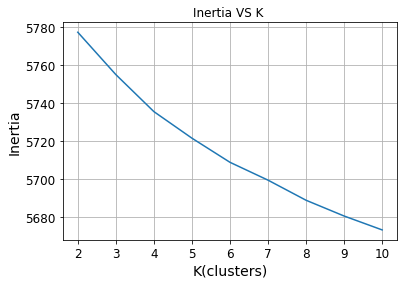

In [28]:
k=[2,3,4,5,6,7,8,9,10]
inertia=[]
for i in k:
    model=KMeans(n_clusters=i, n_jobs=-1)
    model.fit(X_train)
    inertia.append(model.inertia_)
#finding best k using elbow method    
plt.plot(k, inertia)
plt.xlabel('K(clusters)')
plt.ylabel('Inertia')
plt.title('Inertia VS K ')
plt.grid()
plt.show()

In [58]:
# model=KMeans(n_clusters=6, n_jobs=-1)
# y_kmeans = model.fit_predict(X_train)
# filename = 'kmodel.pickle'
# pickle.dump(model, open(filename, 'wb'))

In [63]:
with open('kmodel.pickle','rb') as f:
    model = pickle.load(f)

In [66]:
cluster1,cluster2,cluster3,cluster4,cluster5,cluster6=[],[],[],[],[],[]
for i in range(model.labels_.shape[0]):
    if model.labels_[i] == 0:
        cluster1.append(preprocessed_reviews[i])
    elif model.labels_[i] == 1:
        cluster2.append(preprocessed_reviews[i])
    elif model.labels_[i] == 2:
        cluster3.append(preprocessed_reviews[i])
    elif model.labels_[i] == 3:
        cluster4.append(preprocessed_reviews[i])
    elif model.labels_[i] == 4:
        cluster5.append(preprocessed_reviews[i])
    else:
        cluster6.append(preprocessed_reviews[i])

In [157]:
centroids = model.cluster_centers_
filtered_data['clusters'] = model.labels_

In [68]:
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

In [69]:
filtered_data['cen_x'] = filtered_data.clusters.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3], 4:cen_x[4], 5:cen_x[5]})
filtered_data['cen_y'] = filtered_data.clusters.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2],3:cen_y[3], 4:cen_y[4], 5:cen_y[5]})

In [70]:
colors = ['#DF2020', '#81DF20', '#2095DF','#FF0000','#FFFF00','#0000FF']
filtered_data['c'] = filtered_data.clusters.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3], 4:colors[4], 5:colors[5]})

In [71]:
x1 = filtered_data.loc[:200,'clusters']
x2 = filtered_data.loc[:200,'Date']
x3 = filtered_data.loc[:200,'c']

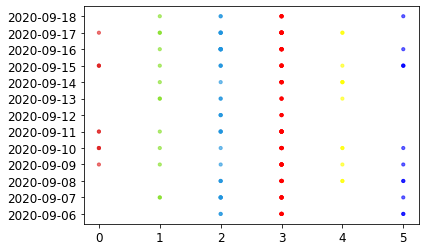

In [72]:
plt.scatter(x1,x2, c=x3, alpha = 0.6, s=10)

<AxesSubplot:xlabel='clusters', ylabel='Count'>

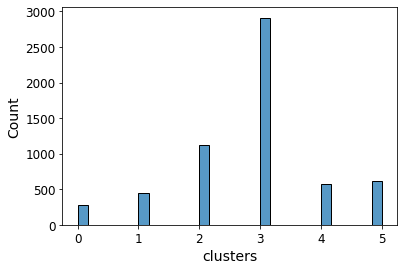

In [73]:
sns.histplot(data=filtered_data,x = 'clusters',bins=30)

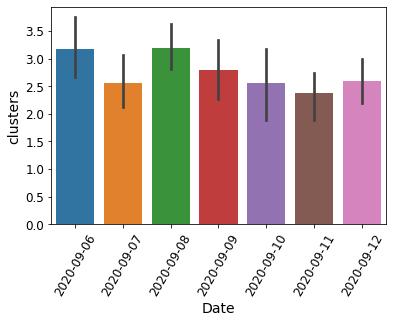

In [173]:
x1 = filtered_data.loc[:100, 'Date']
sns.barplot(data=filtered_data,x=x1,y='clusters')
plt.xticks(rotation=60)
plt.show()

In [158]:
unique = {0:'#DF2020',1:'#81DF20',2:'#2095DF',3:'#FF0000',4:'#FFFF00',5:'#0000FF'}
labels = filtered_data['clusters'].unique()

In [159]:
labels = labels.tolist()

In [198]:
x1 = filtered_data.loc[:400,'Date']
x2 = filtered_data.loc[:400,'clusters']
colors=filtered_data.loc[:400,'clusters']
px.bar(x=x1,y=x2, color=colors,range_y=[0,80])

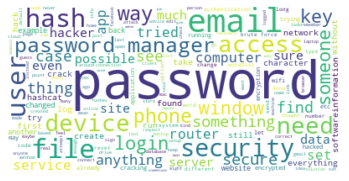

In [103]:
#for cluster 1
data=''
for i in cluster1:
    data+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(data)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

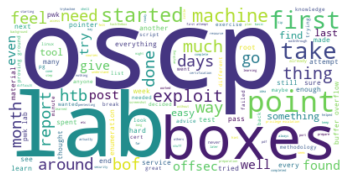

In [104]:
#for cluster 2
data=''
for i in cluster2:
    data+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(data)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

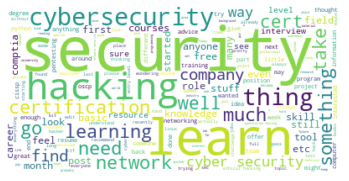

In [105]:
#for cluster 3
data=''
for i in cluster3:
    data+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(data)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

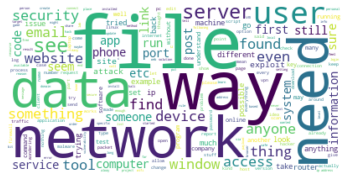

In [106]:
#for cluster 4
data=''
for i in cluster4:
    data+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(data)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

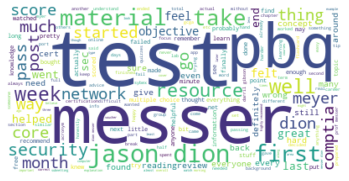

In [107]:
#for cluster 5
data=''
for i in cluster5:
    data+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(data)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

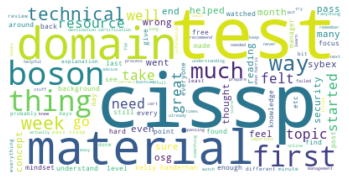

In [108]:
#for cluster 6
data=''
for i in cluster6:
    data+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(data)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [109]:
print("Top 5 terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tf_idf_vect.get_feature_names()
for i in range(6):
    print("Cluster %d:" % (i+1), end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()
    print('-'*50)

Top 5 terms per cluster:
Cluster 1: password
 hash
 passwords
 email
 file
 access
 user
 crack
 phone
 login
--------------------------------------------------
Cluster 2: oscp
 boxes
 lab
 pwk
 labs
 htb
 points
 machine
 report
 take
--------------------------------------------------
Cluster 3: security
 hacking
 cybersecurity
 learn
 cyber
 learning
 comptia
 network
 python
 field
--------------------------------------------------
Cluster 4: anyone
 could
 windows
 network
 ip
 file
 find
 data
 way
 email
--------------------------------------------------
Cluster 5: messer
 dion
 test
 jason
 core
 pbqs
 comptia
 first
 also
 pass
--------------------------------------------------
Cluster 6: cissp
 test
 boson
 sybex
 kelly
 technical
 pass
 also
 security
 last
--------------------------------------------------


In [110]:
data = pd.read_excel('data.xlsx')

In [111]:
clean_article = preprocess(data.article.values)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 31.57it/s]


In [112]:
clean_article

['social engineering proven successful way criminal inside organization social engineer trusted employee password simply log snoop around sensitive data access card code order physically inside facility criminal access data steal assets even harm penetration tester walks current events public information available social network sites cisco shirt purchased thrift store prepare illegal entry shirt helped convince building reception employees cisco employee technical support visit inside give team members illegal entry well also managed drop several malware laden usbs hack company network within sight employees need go thrift store shopping pull social engineering attack though well e mail phone social media attacks common human nature advantage preying greed fear curiosity even desire others criminals often take weeks months place even coming door making phone call preparation might include finding company phone list org chart researching employees social networking sites linkedin faceb

In [113]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [199]:
print(similar(" ".join(cluster1),clean_article[0]))
print(similar(" ".join(cluster2),clean_article[0]))
print(similar(" ".join(cluster3),clean_article[0]))
print(similar(" ".join(cluster4),clean_article[0]))
print(similar(" ".join(cluster5),clean_article[0]))
print(similar(" ".join(cluster6),clean_article[0]))

0.0029919498774337366
0.0009401398731357765


KeyboardInterrupt: 

In [ ]:
print(similar(" ".join(cluster1),clean_article[1]))
print(similar(" ".join(cluster2),clean_article[1]))
print(similar(" ".join(cluster3),clean_article[1]))
print(similar(" ".join(cluster4),clean_article[1]))
print(similar(" ".join(cluster5),clean_article[1]))
print(similar(" ".join(cluster6),clean_article[1]))

In [204]:
print(similar(" ".join(cluster1),clean_article[2]))
print(similar(" ".join(cluster2),clean_article[2]))
print(similar(" ".join(cluster3),clean_article[2]))
print(similar(" ".join(cluster4),clean_article[2]))
print(similar(" ".join(cluster5),clean_article[2]))
print(similar(" ".join(cluster6),clean_article[2]))

0.0005057879736814327
0.00046086825274475846
0.0007652652316220003
0.0020667507026506968
0.00038643238456931983
0.0011795560351859056


In [205]:
print(similar(" ".join(cluster1),clean_article[3]))
print(similar(" ".join(cluster2),clean_article[3]))
print(similar(" ".join(cluster3),clean_article[3]))
print(similar(" ".join(cluster4),clean_article[3]))
print(similar(" ".join(cluster5),clean_article[3]))
print(similar(" ".join(cluster6),clean_article[3]))

0.00047202785413889755
0.00037991795636770466
0.000636694283281204
0.0014441442280816175
0.0002825074741369591
0.0006484683794466404


In [206]:
print(similar(" ".join(cluster1),clean_article[4]))
print(similar(" ".join(cluster2),clean_article[4]))
print(similar(" ".join(cluster3),clean_article[4]))
print(similar(" ".join(cluster4),clean_article[4]))
print(similar(" ".join(cluster5),clean_article[4]))
print(similar(" ".join(cluster6),clean_article[4]))

0.0001734863868790911
0.00013444692475840118
0.00037205792575086265
0.0005834784432065788
0.00017774915472548703
0.00033051799797621285


In [207]:
print(similar(" ".join(cluster1),clean_article[5]))
print(similar(" ".join(cluster2),clean_article[5]))
print(similar(" ".join(cluster3),clean_article[5]))
print(similar(" ".join(cluster4),clean_article[5]))
print(similar(" ".join(cluster5),clean_article[5]))
print(similar(" ".join(cluster6),clean_article[5]))

0.0005087921495583463
0.000309739934030017
0.0006248226414897855
0.0015598092163987341
0.0002824775334061783
0.000828764181216363


In [117]:
filtered_data['clusters'] = filtered_data['clusters'].map({0:'phishing',1:'DOS',2:'SQL injection', 3:'Insider Threads',4:'Social Engineering',5:'Data Breech'})

In [119]:
filtered_data[filtered_data['clusters'] == 'Social Engineering']

,Id,Title,Body,Date,clusters,cen_x,cen_y,c
32,iorrc9,Passed the Sec+! :D,On my first attempt and with no experience in ...,2020-09-08,Social Engineering,0.000168,0.000507,#FFFF00
43,ip3a4z,"A+ Certified as of today, 1001 and 1002 resour...",Just wanted to add another recommendation for ...,2020-09-08,Social Engineering,0.000168,0.000507,#FFFF00
55,ipkaim,Just passed Network +,740/720. Barely passed but a pass is a pass. I...,2020-09-09,Social Engineering,0.000168,0.000507,#FFFF00
60,ipu3d3,Passed my Net+,Got a score of 791. Not too shabby. Could have...,2020-09-10,Social Engineering,0.000168,0.000507,#FFFF00
75,iqcrwj,Passed Security+ Today!,Big thanks to this community for keeping me gr...,2020-09-10,Social Engineering,0.000168,0.000507,#FFFF00
...,...,...,...,...,...,...,...,...
5902,ph60dy,Just passed A+ Core 1 with a score of 771!,There were so many questions where two answers...,2021-09-03,Social Engineering,0.000168,0.000507,#FFFF00
5909,phehd7,Just passed Network+ today! Secret to subnetti...,"Hey all, just passed my Network+ exam today af...",2021-09-03,Social Engineering,0.000168,0.000507,#FFFF00
5921,pht7f0,Trifecta Accomplished,"So, usually just avid upvoter and occasional c...",2021-09-04,Social Engineering,0.000168,0.000507,#FFFF00
5940,pihm2j,Passed ITF+ on a Whim!,"I have the A+ core 1 scheduled for December, a...",2021-09-05,Social Engineering,0.000168,0.000507,#FFFF00


In [121]:
filtered_data['clusters'].value_counts()

Insider Threads       2912
SQL injection         1129
Data Breech            616
Social Engineering     572
DOS                    444
phishing               274
Name: clusters, dtype: int64

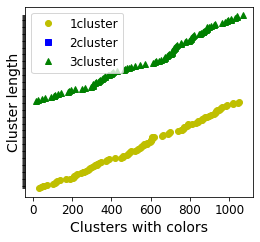

In [124]:
X = filtered_data.Body
y = filtered_data.clusters

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y=='Social Engineering'].iloc[:100], "yo", label="1cluster")
plt.plot(X[y=='SQL Injection'].iloc[:100], "bs", label="2cluster")
plt.plot(X[y=='DOS'].iloc[:100], "g^", label="3cluster")
plt.xlabel("Clusters with colors", fontsize=14)
plt.ylabel("Cluster length", fontsize=14)
plt.legend(fontsize=12)
plt.tick_params(labelleft=False)

plt.show()

In [125]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(preprocessed_reviews)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

final_counts = count_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaa', 'aaaaaaaa', 'aaaaaaaaaaaaaaaa', 'aaaaaaaaaaaabbbb', 'aaaaaaab']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (5947, 20430)
the number of unique words  20430


In [126]:
#bi-gram, tri-gram and n-gram

#removing stop words like "not" should be avoided before building n-grams
# count_vect = CountVectorizer(ngram_range=(1,2))
# please do read the CountVectorizer documentation http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# you can choose these numebrs min_df=10, max_features=5000, of your choice
count_vect = CountVectorizer(ngram_range=(1,2), min_df=10, max_features=5000)
final_bigram_counts = count_vect.fit_transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_bigram_counts))
print("the shape of out text BOW vectorizer ",final_bigram_counts.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_bigram_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (5947, 5000)
the number of unique words including both unigrams and bigrams  5000


In [127]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(preprocessed_reviews)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['abac', 'abc', 'abilities', 'ability', 'absolute', 'absolutely', 'absorb', 'abstract', 'abuse', 'academic']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (5947, 5605)
the number of unique words including both unigrams and bigrams  5605


In [164]:
is_your_ram_gt_16g=False
want_to_use_google_w2v = False
want_to_train_w2v = True

if want_to_train_w2v:
    # min_count = 5 considers only words that occured atleast 5 times
    w2v_model=Word2Vec(list_of_sentance,min_count=5,size=50, workers=4)
    print(w2v_model.wv.most_similar('great'))
    print('='*50)
    print(w2v_model.wv.most_similar('worst'))
    
elif want_to_use_google_w2v and is_your_ram_gt_16g:
    if os.path.isfile('GoogleNews-vectors-negative300.bin'):
        w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
        print(w2v_model.wv.most_similar('great'))
        print(w2v_model.wv.most_similar('worst'))
    else:
        print("you don't have gogole's word2vec file, keep want_to_train_w2v = True, to train your own w2v ")

[('resource', 0.9770987629890442), ('helpful', 0.9751705527305603), ('books', 0.9741930365562439), ('watch', 0.9692419767379761), ('helped', 0.9666405320167542), ('recommend', 0.9562864899635315), ('material', 0.950256884098053), ('highly', 0.9499112963676453), ('chapple', 0.9464558362960815), ('adam', 0.9439323544502258)]
[('sentence', 0.9966078400611877), ('thoroughly', 0.9955238699913025), ('express', 0.9945294857025146), ('spot', 0.9939133524894714), ('swear', 0.9937508702278137), ('selecting', 0.993495762348175), ('frankly', 0.9933652877807617), ('repeatedly', 0.9931060671806335), ('mixed', 0.9930683970451355), ('facts', 0.9927611351013184)]


In [165]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  6963
sample words  ['task', 'type', 'audio', 'system', 'company', 'suggestions', 'process', 'place', 'anyone', 'done', 'nist', 'provide', 'guidance', 'template', 'things', 'starting', 'home', 'later', 'month', 'someone', 'although', 'comes', 'recommended', 'trusted', 'feel', 'trust', 'stranger', 'house', 'locks', 'internal', 'doors', 'understand', 'could', 'put', 'rooms', 'nothing', 'stopping', 'removing', 'buy', 'wifi', 'cameras', 'set', 'entering', 'way', 'text', 'message', 'goes', 'watch', 'happening', 'call']


In [298]:
filtered_data['Clusters'].unique()

array(['Data Breech', 'SQL injection', 'Social Engineering', 'DOS',
       'Phishing', 'Insider Threads'], dtype=object)

In [299]:
X= filtered_data['Body']
y= filtered_data.iloc[:, -1].values

In [301]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

def tokenize(CodeSnippet,max_features=10000):
    max_fatures=max_features
    tokenizer = Tokenizer(num_words=max_fatures)
    tokenizer.fit_on_texts(CodeSnippet)
    dictionary = tokenizer.word_index
    return tokenizer,dictionary,max_fatures

def text_to_seq(CodeSnippet,seq=50):
    X = tokenizer.texts_to_sequences(CodeSnippet)
    X = pad_sequences(X,seq)    
#     Y = pd.get_dummies(lang)
    return X

In [302]:
tokenizer, dictionary,max_features = tokenize(X)

In [303]:
X = text_to_seq(X)

In [304]:
one_lang = OneHotEncoder(sparse=False)
def one_hot_encoder_lang(y,inverse=False):
    if inverse:
        Y = one_lang.inverse_transform(y)
    else:
        y = np.array(y)
        y = y.reshape(-1,1)
        Y = one_lang.fit_transform(y)
#         print ("Languages :" +str(len(Y.columns)))
    return Y,one_lang

In [305]:
Y,one_lang = one_hot_encoder_lang(y)

In [306]:
def split(X,Y, test_size=0.20):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = test_size, random_state = 42)
    print ( X_train.shape)
    print ( X_test.shape)
    return X_train, X_test, Y_train, Y_test

In [307]:
X_train, X_test, Y_train, Y_test = split(X,Y)

(4757, 50)
(1190, 50)


In [308]:
def model_(max_fatures=max_features,embed_dim=128,lstm_out=64,input_length=50,loss='categorical_crossentropy',metrics=['accuracy','mse']):
    embed_dim =embed_dim
    lstm_out = lstm_out
    model = Sequential()
    model.add(Embedding(max_fatures, embed_dim,input_length = input_length))
    model.add(Conv1D(filters=128, kernel_size=3, padding='same', dilation_rate=1,activation='relu'))
    model.add(MaxPooling1D(pool_size=4))
    model.add(Conv1D(filters=64, kernel_size=3, padding='same', dilation_rate=1,activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(lstm_out))
    model.add(Dropout(0.5))
    model.add(Dense(64))
    model.add(Dense(Y.shape[1],activation='softmax'))
    model.compile(loss = loss, optimizer='adam',metrics = metrics)
    print(model.summary())
    return model

In [309]:
model_main = model_(max_fatures = max_features)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 128)           1280000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 128)           49280     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 12, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 12, 64)            24640     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 6, 64)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

In [310]:
def train_model(X_train,Y_train, X_test,Y_test, epochs=100, batch_size=32, save_model=False):
    history = ''
    score = 0
    acc = 0
    mse = 0
    batch_size = batch_size
    history=model_main.fit(X_train, Y_train, epochs = epochs,validation_data=(X_test,Y_test), batch_size=batch_size)
    score,acc,mse = model_main.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
    print(model_main.metrics_names)
    print("Validation loss: %f" % (score))
    print("Validation acc: %f" % (acc))
    if save_model:    
        print('Saving Model...')
        model_main.save('purpose_model_2.h5')
        model_main.save_weights('purpose_model_weights_2.h5')
        print('Done')
    return model_main,history, score, acc,mse

In [ ]:
model_main,history,score,acc,mse = train_model(X_train,Y_train,X_test,Y_test,epochs=100,save_model=True)

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('Accuracy')

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.savefig('loss')

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.savefig('mse')

In [59]:
def predict(X_test,tokenized=False):
    model=load_model("purpose_model_2.h5")
    if tokenized:
        X = text_to_seq(X_test)
        y_preds_lang = model.predict(X)
        y_preds_lang = one_hot_encoder_lang(y_preds_lang,inverse=True)
    else:
        y_preds_lang = model.predict(X_test)
        score = accuracy_score(Y_test.argmax(axis=1),np.argmax(y_preds_lang,axis=1))
        f1 = f1_score(Y_test.argmax(axis=1),np.argmax(y_preds_lang,axis=1),average='micro')
        print(classification_report(Y_test.argmax(axis=1),np.argmax(y_preds_lang,axis=1)))
        print(confusion_matrix(Y_test.argmax(axis=1),np.argmax(y_preds_lang,axis=1)))
        y_preds_lang = one_hot_encoder_lang(y_preds_lang,inverse=True)
        return f1,score,y_preds_lang
    return y_preds_lang

In [200]:
def new_doc(test):
    text = []
    text.append(preprocess(test))
    return text

In [201]:
text = new_doc(['hello, how are you and i am also fine i work at your home buddy','yoo great brother'])

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 654.95it/s]


In [ ]:
ypreds = predict(X_test)

In [344]:
def preprocess(x):
    return pd.Series(x).replace(r'\b([A-Za-z])\1+\b', '', regex=True)\
        .replace(r'\b[A-Za-z]\b', '', regex=True)

transformer = FunctionTransformer(preprocess)


In [345]:
vectorizer = TfidfVectorizer(max_features=20000)

In [346]:
X= filtered_data['Body']
y= filtered_data.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = split(X,y)

(4757,)
(1190,)


In [347]:
clf = MultinomialNB(alpha=1)
clf_pipe = Pipeline([('preprocessing', transformer), ('vectorizer', vectorizer), ('clf', clf)])
MNB_pipe = Pipeline([('transformer', FunctionTransformer(lambda x: x.todense(), accept_sparse=True)), ('MNB', RandomForestClassifier())])

param_grid = dict(clf=[MNB_pipe, LogisticRegression(max_iter = 400), MultinomialNB(), MLPClassifier(max_iter = 400)])
grid_search = GridSearchCV(clf_pipe, param_grid=param_grid, cv=3)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        FunctionTransformer(func=<function preprocess at 0x000001A247B4EE50>)),
                                       ('vectorizer',
                                        TfidfVectorizer(max_features=20000)),
                                       ('clf', MultinomialNB(alpha=1))]),
             param_grid={'clf': [Pipeline(steps=[('transformer',
                                                  FunctionTransformer(accept_sparse=True,
                                                                      func=<function <lambda> at 0x000001A2490E9820>)),
                                                 ('MNB',
                                                  RandomForestClassifier())]),
                                 LogisticRegression(max_iter=400),
                                 MultinomialNB(),
                                 MLPClassifier(max_iter=400)]})

In [348]:
final_clf = grid_search.best_estimator_
best_score = grid_search.best_score_ 
comparaison_result = pd.DataFrame(grid_search.cv_results_).sort_values(by=['rank_test_score'])

In [349]:
comparaison_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,3.537837,0.218605,0.413300,0.085681,LogisticRegression(max_iter=400),{'clf': LogisticRegression(max_iter=400)},0.846784,0.847415,0.846057,0.846752,0.000555,1
3,140.417297,4.040273,0.313220,0.016081,MLPClassifier(max_iter=400),{'clf': MLPClassifier(max_iter=400)},0.825977,0.843001,0.849842,0.839607,0.010034,2
0,22.441550,3.440968,1.041364,0.276635,"(FunctionTransformer(accept_sparse=True,\n ...",{'clf': (FunctionTransformer(accept_sparse=Tru...,0.763556,0.773014,0.769716,0.768762,0.003920,3
2,0.767766,0.101735,0.328779,0.065998,MultinomialNB(),{'clf': MultinomialNB()},0.507566,0.504414,0.494637,0.502206,0.005504,4


In [350]:
y_preds = final_clf.predict(clean_article)
# final_clf.score(X_test,Y_test)

In [351]:
y_preds

array(['phishing', 'Data Breech', 'phishing', 'Data Breech', 'DOS',
       'Data Breech'], dtype=object)

In [90]:
import pickle
filename = 'lg_rfmodel.sav'
pickle.dump(final_clf, open(filename, 'wb'))